This code was written in R? Took a while to absorb it and write for Python
https://www.mathworks.com/help/images/examples/color-based-segmentation-using-k-means-clustering.html

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
img = cv2.imread('H&E.png') # reading the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert channels to R-G-B

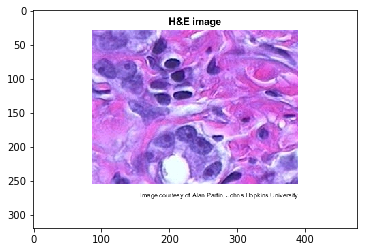

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show() # original image

In [4]:
from skimage import color
lab_img = color.rgb2lab(img) # converting the image to L*AB format
# L*AB image cannot be shown by plt as above, as the values are not in 0..1 range like RGB

In [5]:
l_channel, a_channel, b_channel = cv2.split(lab_img)
# splitting L*AB image into its component channels

In [6]:
len(b_channel)
b_channel.dtype
type(b_channel)
b_channel.shape

(320, 477)

In [7]:
len(a_channel)

320

In [8]:
ab = np.stack((a_channel, b_channel), axis=-1)
# stacking the two channels a and b

In [9]:
ab

array([[[-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        ..., 
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342]],

       [[-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        ..., 
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342]],

       [[-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        ..., 
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342]],

       ..., 
       [[-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        ..., 
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342],
        [-0.00245494,  0.00465342]],

       [[-0.00245494,  0.00465342],
        [-0.00245494,  

In [10]:
ab_rows = ab.shape[0] # get number of rows
ab_cols = ab.shape[1] # get number of cols

In [11]:
ab_rows

320

In [12]:
ab_cols

477

In [13]:
# reshape this into rows*columns and 2 columns
re_ab = np.reshape(ab, (ab_rows*ab_cols,2) )

In [14]:
re_ab

array([[-0.00245494,  0.00465342],
       [-0.00245494,  0.00465342],
       [-0.00245494,  0.00465342],
       ..., 
       [-0.00245494,  0.00465342],
       [-0.00245494,  0.00465342],
       [-0.00245494,  0.00465342]])

In [15]:
re_ab.shape

(152640, 2)

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
kmeans.fit(re_ab)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
labels = kmeans.predict(re_ab)
centroids = kmeans.cluster_centers_

In [19]:
print(centroids)
len(centroids)

[[ 34.76400477 -42.15402693]
 [  0.29687945  -0.48211067]
 [ 53.16861965 -45.99980339]]


3

In [20]:
print(labels)

[1 1 1 ..., 1 1 1]


In [21]:
pixel_labels = np.reshape(labels, (ab_rows, ab_cols))

In [22]:
np.unique(pixel_labels)
# the image has been labeled into three unique labels as n_clusters = 3

array([0, 1, 2])

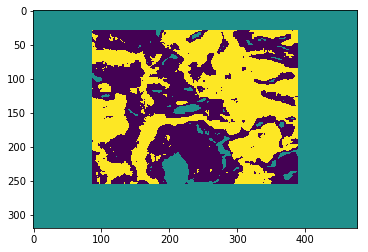

In [23]:
plt.imshow(pixel_labels)
plt.show()

In [24]:
rgb_label = np.matlib.repmat(pixel_labels, 1,3) # repmat repeats a 0-D or 2-D array MXN times

In [25]:
rgb_label

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [26]:
rgb_label.shape

(320, 1431)

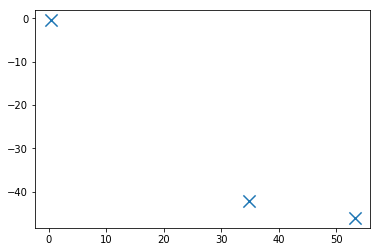

In [29]:
ax = plt.gca()
ax.scatter(centroids[:, 0],centroids[:, 1],
           marker = "x", s=150, linewidths = 5, zorder = 100)
plt.show()

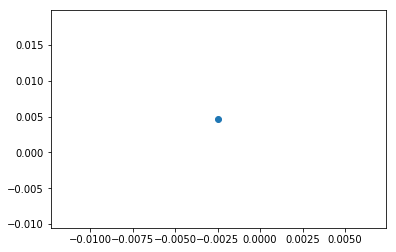

KeyboardInterrupt: 

In [27]:
for i in range(len(re_ab)):
#     print("coordinate:",re_ab[i], "label:", labels[i])
#     print( "i : ",i)
#     print ("color[rgb_label[i]] : ",color[labels[i]])
    ax.scatter(re_ab[i][0], re_ab[i][1])
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(re_ab)
pca_2d = pca.transform(re_ab)

In [ ]:
pca_2d

In [ ]:
for i in range(3):
    if kmeans.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
#     plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 0', 'Cluster 2'])
#     plt.title('K-means clusters the Iris dataset into 3 clusters')
    plt.show()

In [ ]:
for k = 1:nColors
    color = he;
    color(rgb_label ~= k) = 0; # What ~= means there is "for every pixel of 
#     the segmentation image is NOT equal to the current segmentation number,
#     set the image pixel to zero, leaving the other image pixels unchanged"
    segmented_images{k} = color;
end

imshow(segmented_images{1}), title('objects in cluster 1');